In [1]:
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("carolzhangdc/imdb-5000-movie-dataset")
# print("Path to dataset files:", path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
data_path = "../data/raw/movie_metadata.csv"
df = pd.read_csv(data_path, encoding='latin1')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

is_good
0    3265
1    1778
Name: count, dtype: int64


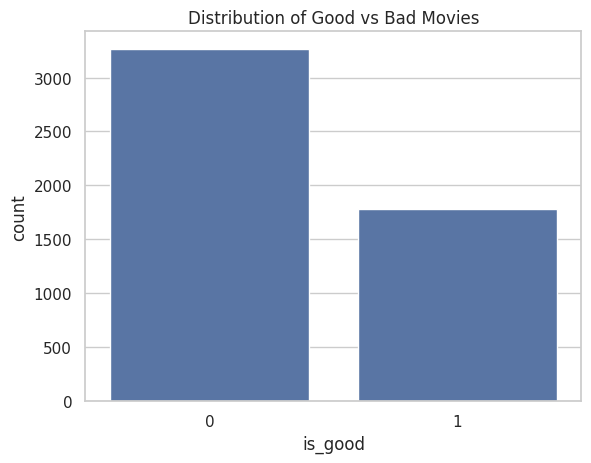

In [7]:
df['is_good'] = (df['imdb_score'] >= 7).astype(int)

print(df['is_good'].value_counts())

sns.countplot(x='is_good', data=df)
plt.title("Distribution of Good vs Bad Movies")
plt.show()


In [8]:
numerical_cols = [
    'budget', 'gross', 'duration', 'num_critic_for_reviews',
    'num_user_for_reviews', 'num_voted_users', 'cast_total_facebook_likes',
    'director_facebook_likes', 'actor_1_facebook_likes',
    'actor_2_facebook_likes', 'actor_3_facebook_likes',
    'facenumber_in_poster', 'title_year', 'aspect_ratio', 'movie_facebook_likes', 'imdb_score'
]

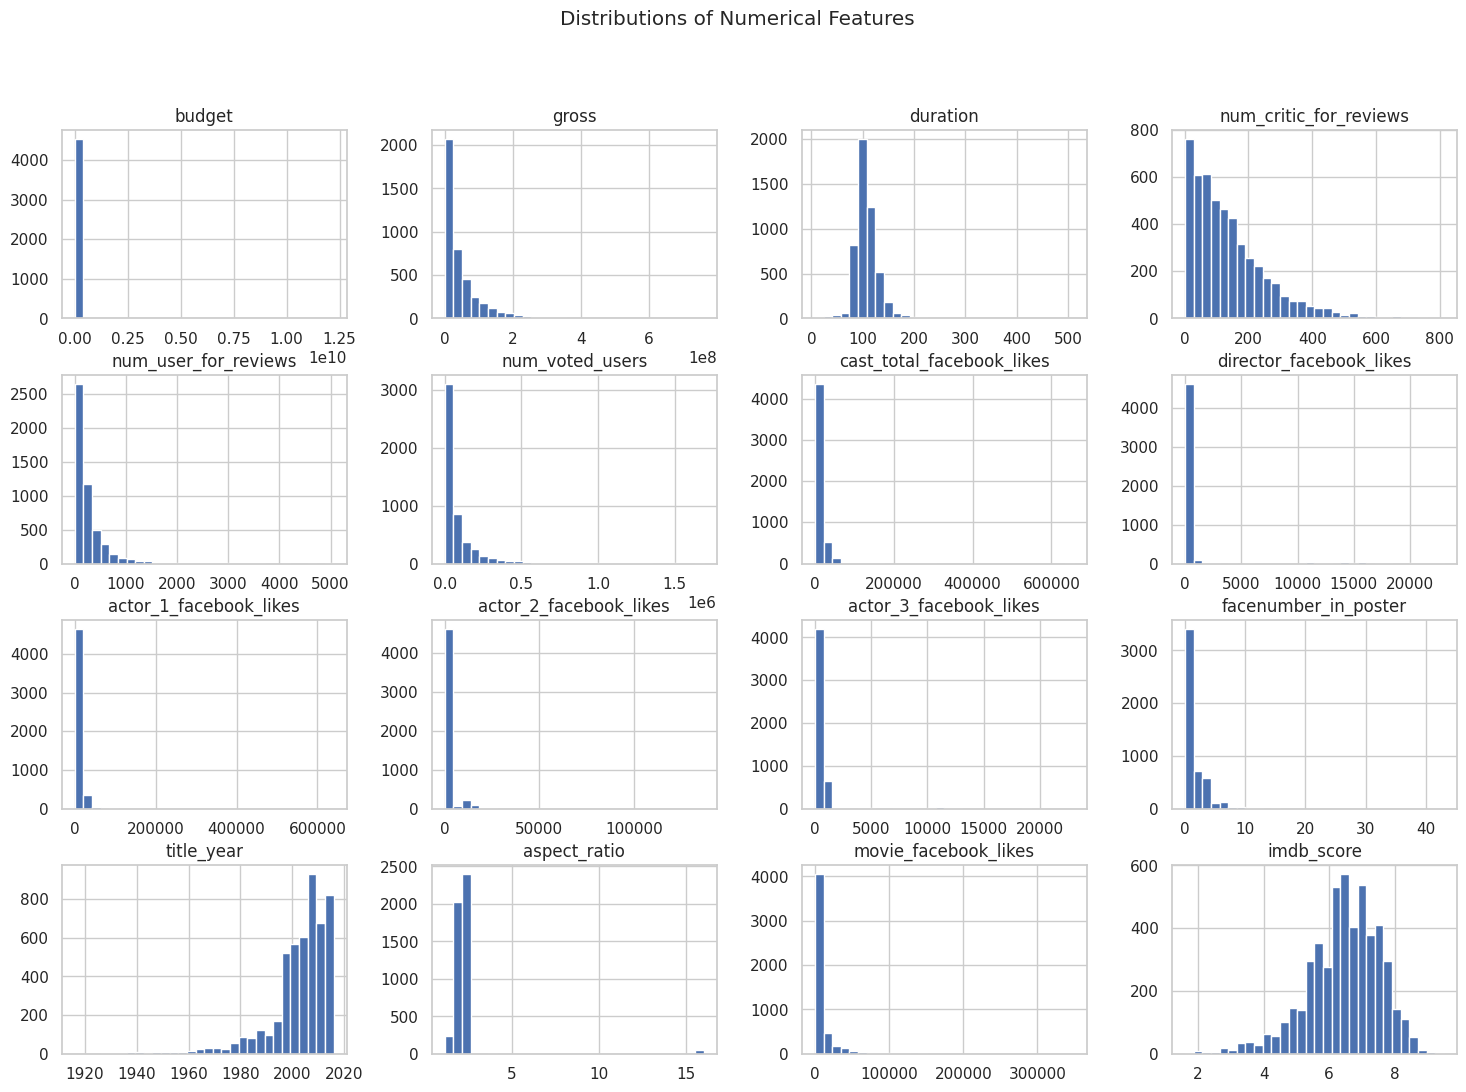

In [9]:
# Histograms
df[numerical_cols].hist(bins=30, figsize=(18,12))
plt.suptitle("Distributions of Numerical Features")
plt.show()

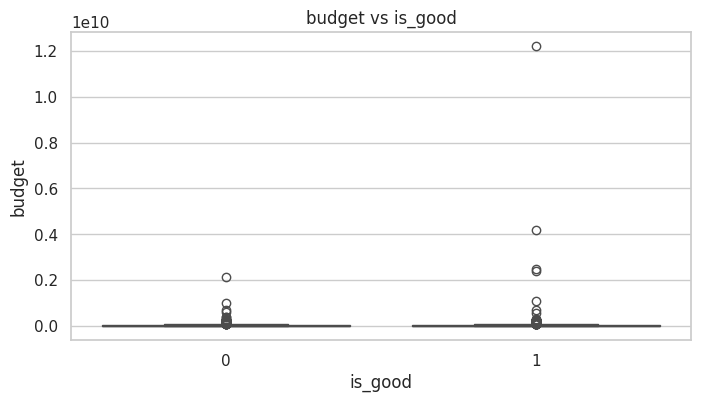

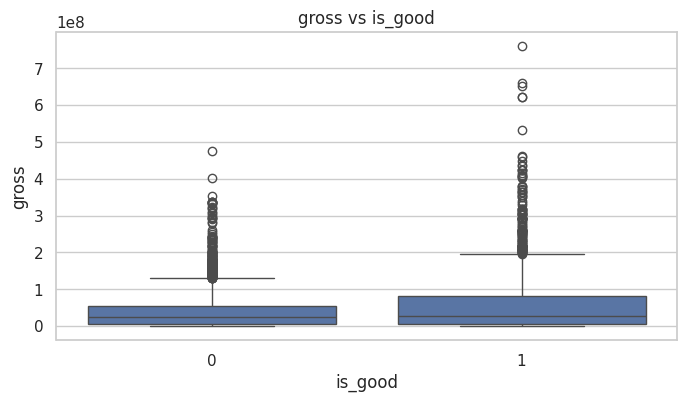

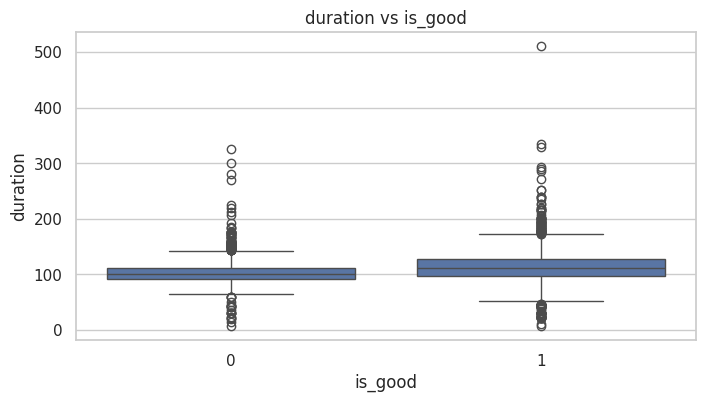

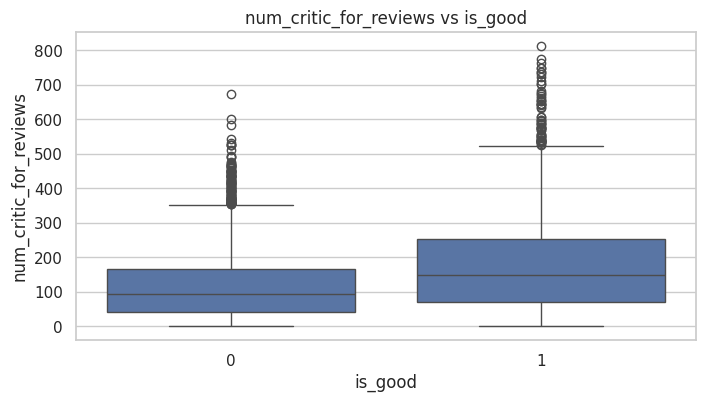

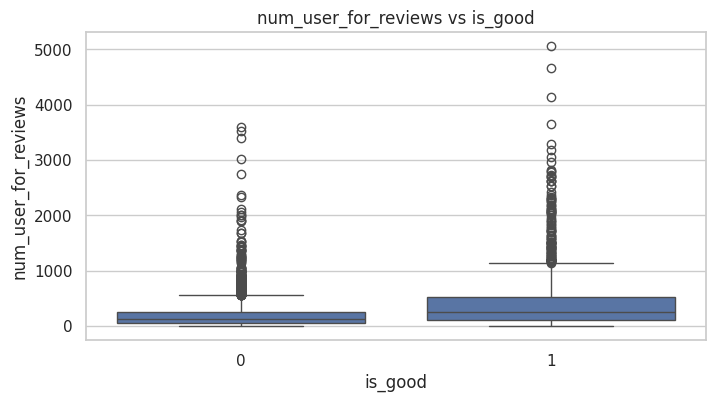

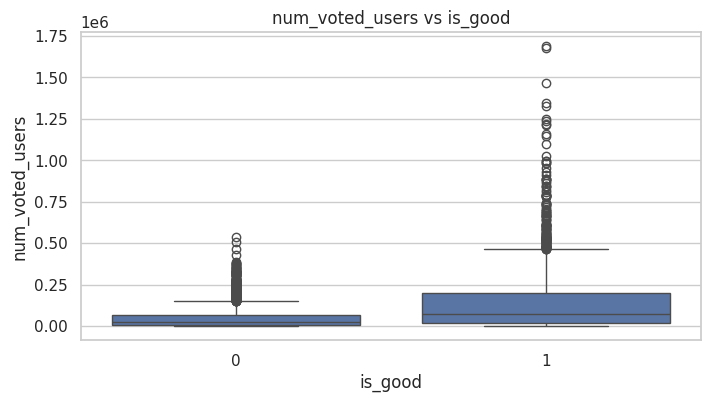

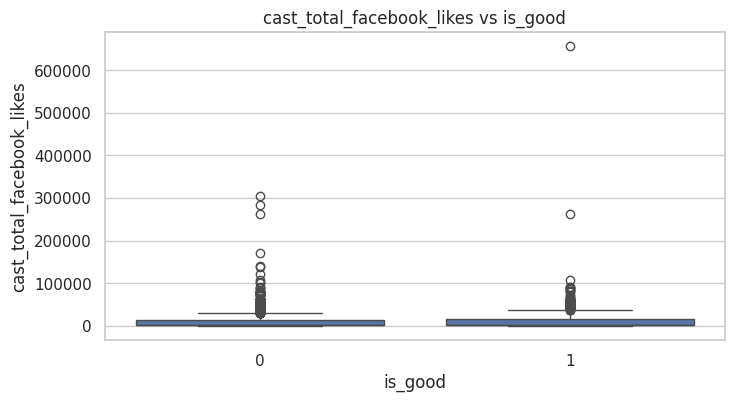

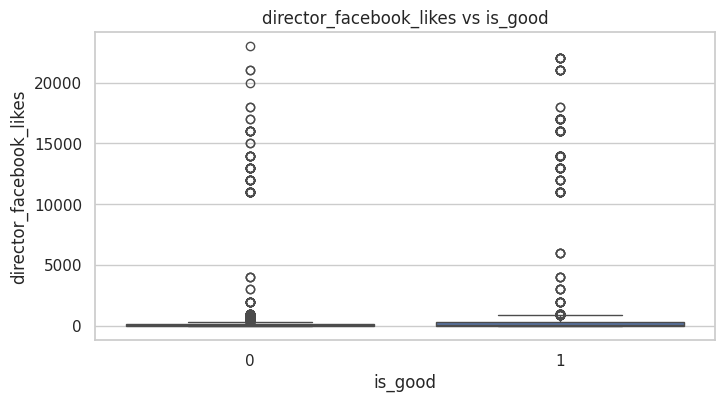

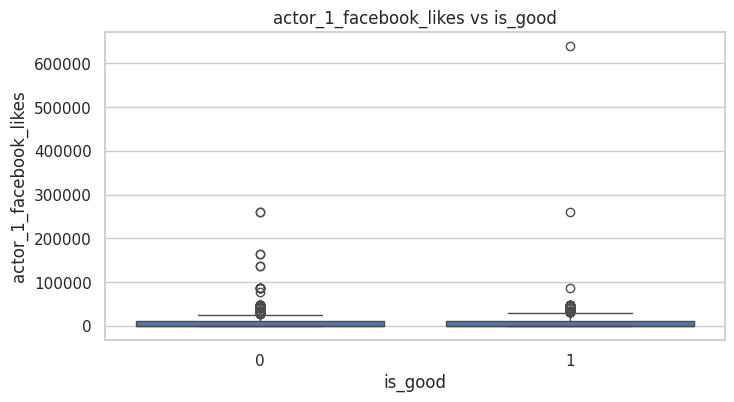

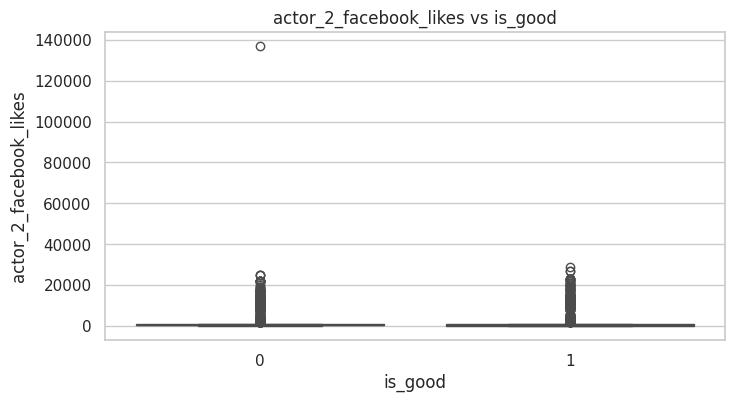

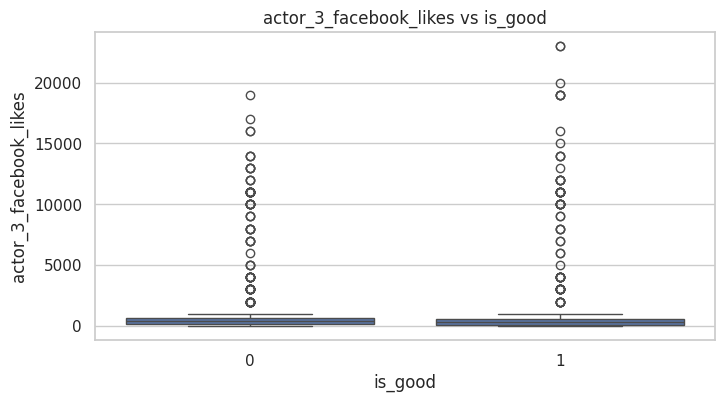

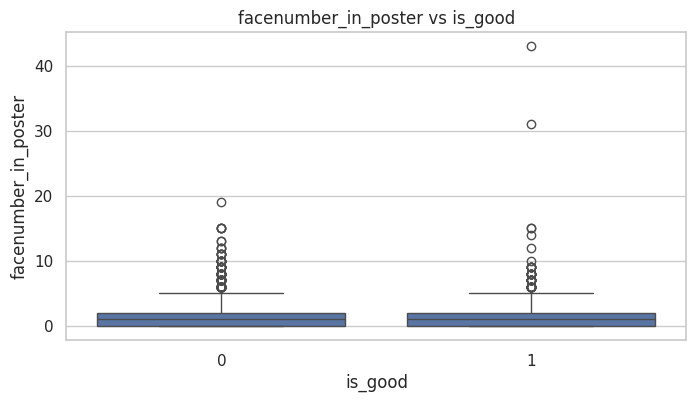

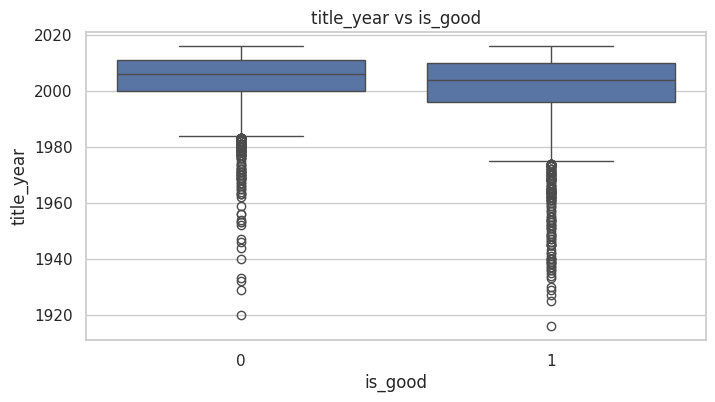

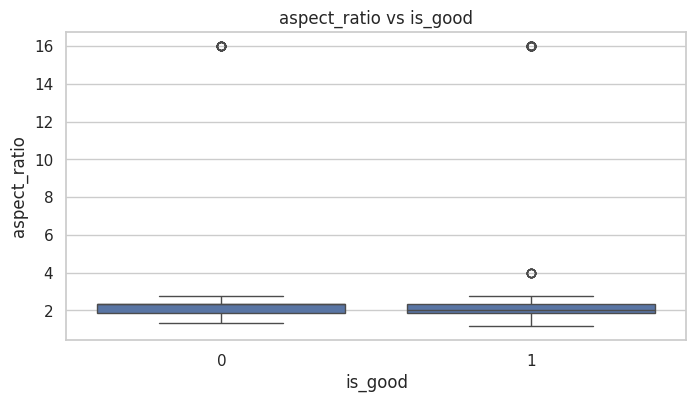

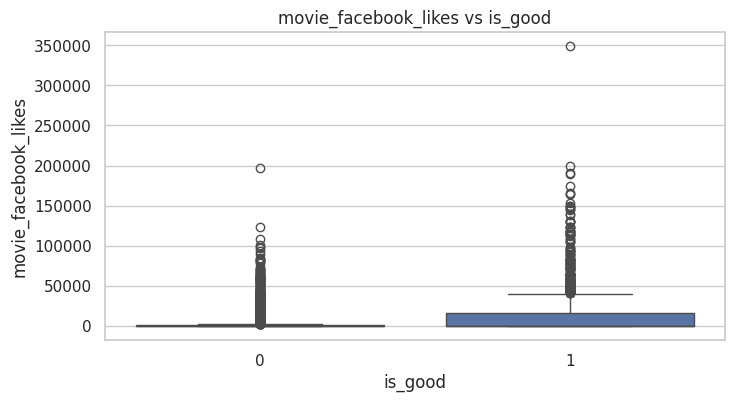

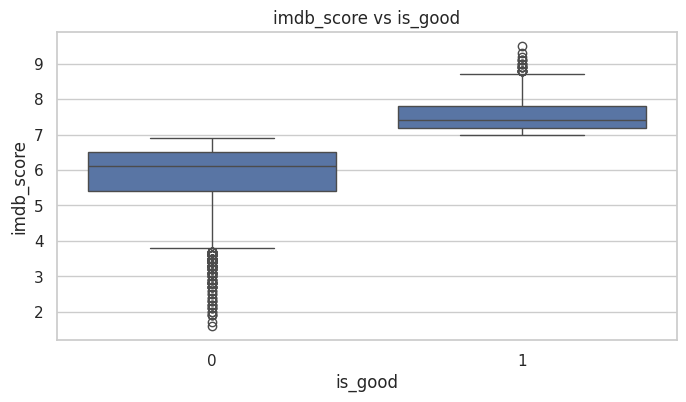

In [10]:
# Boxplots by target
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='is_good', y=col, data=df)
    plt.title(f"{col} vs is_good")
    plt.show()

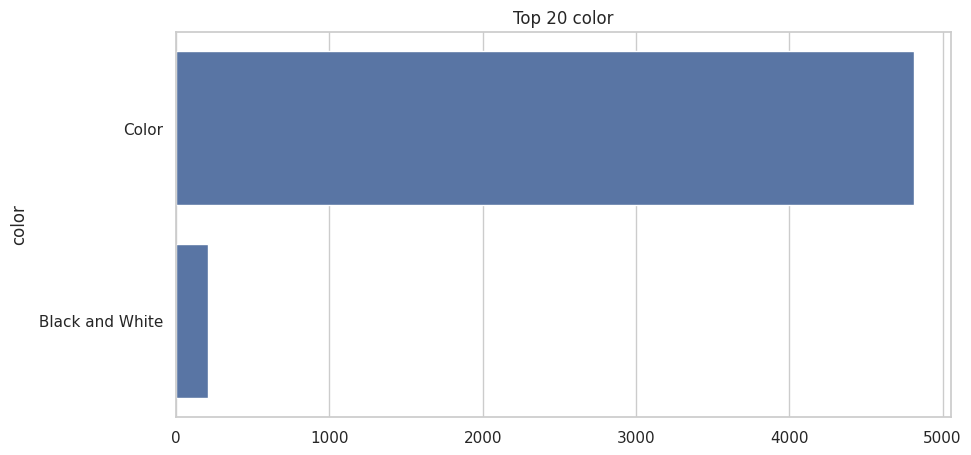

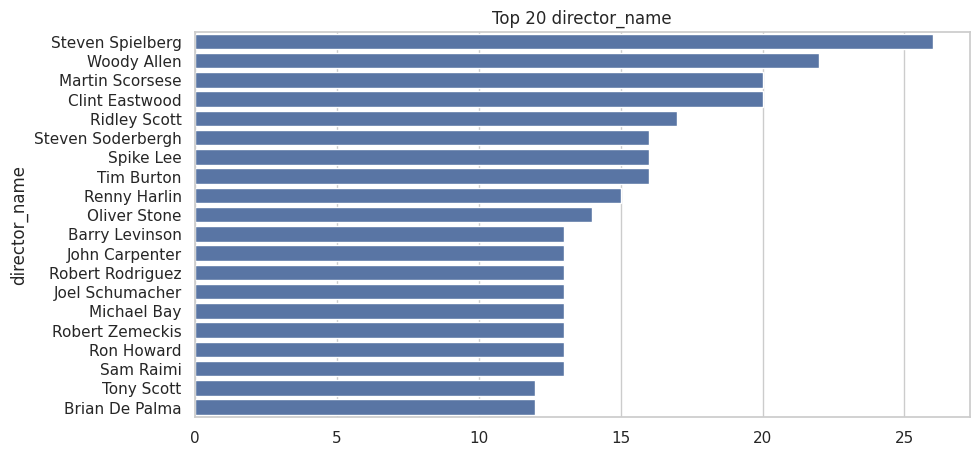

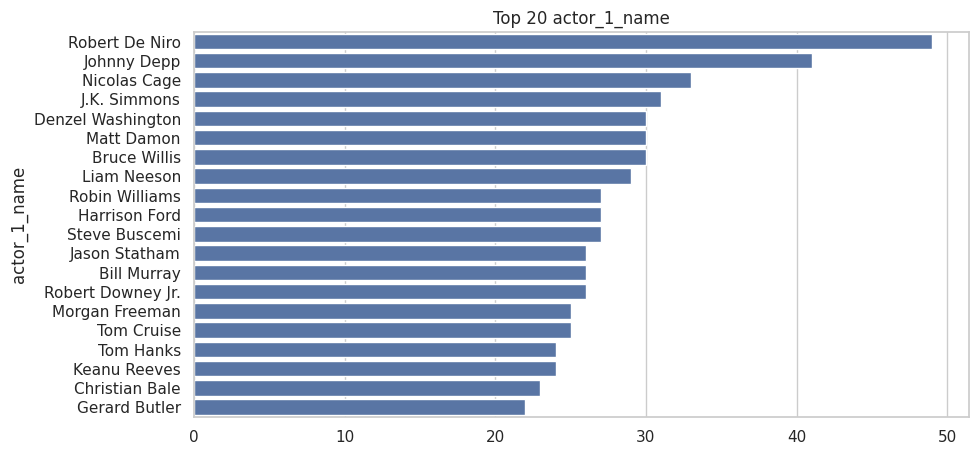

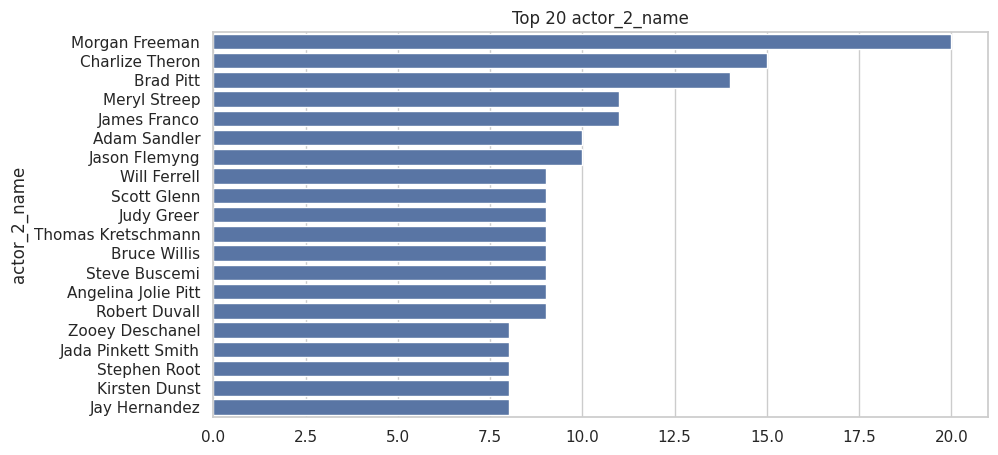

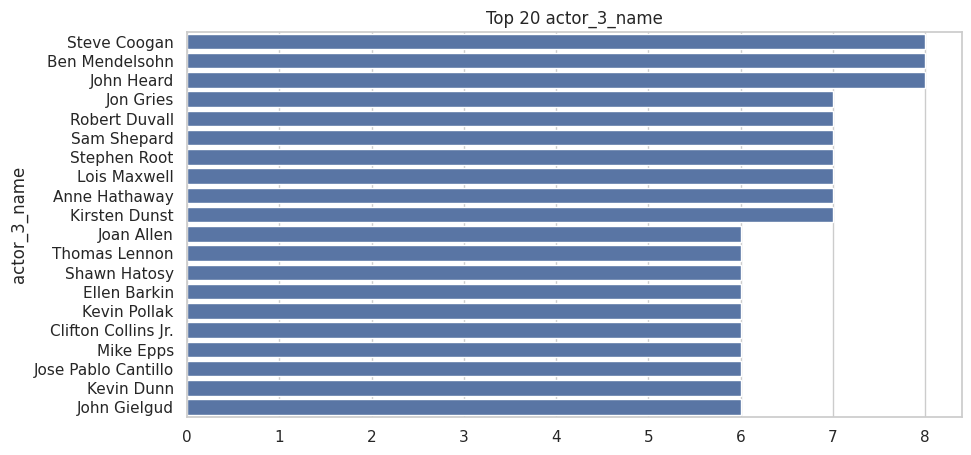

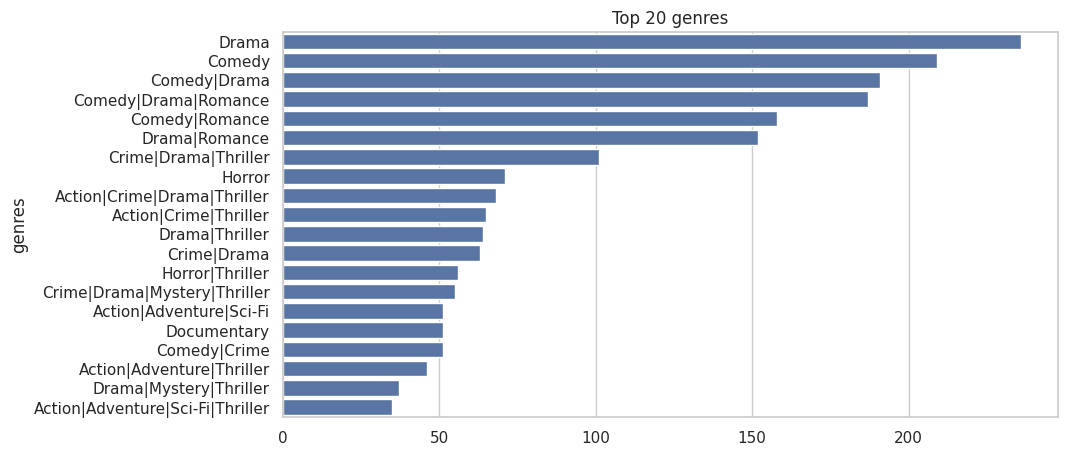

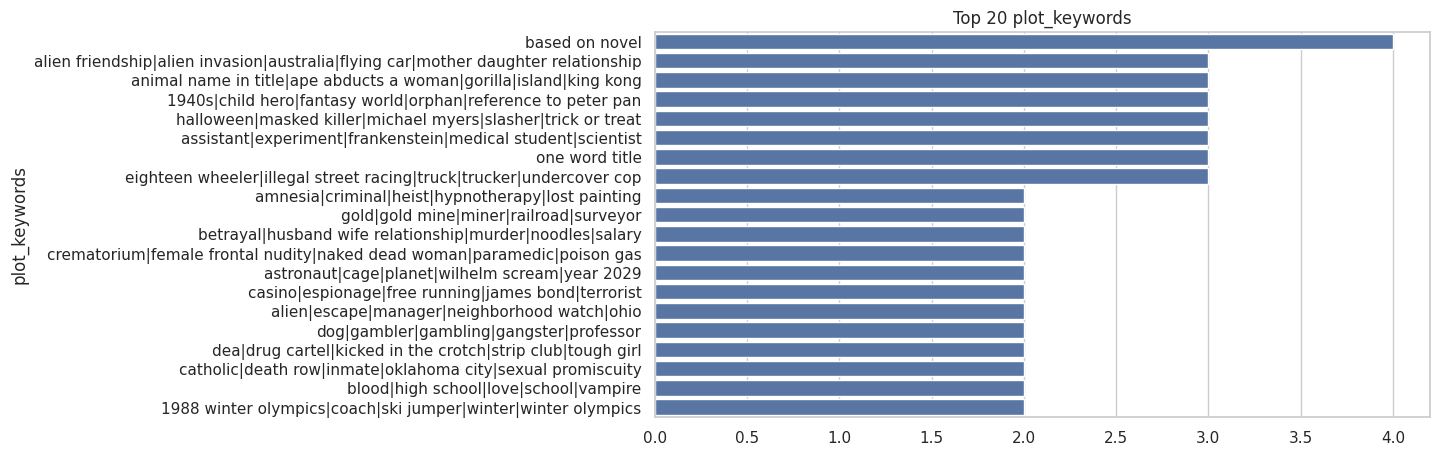

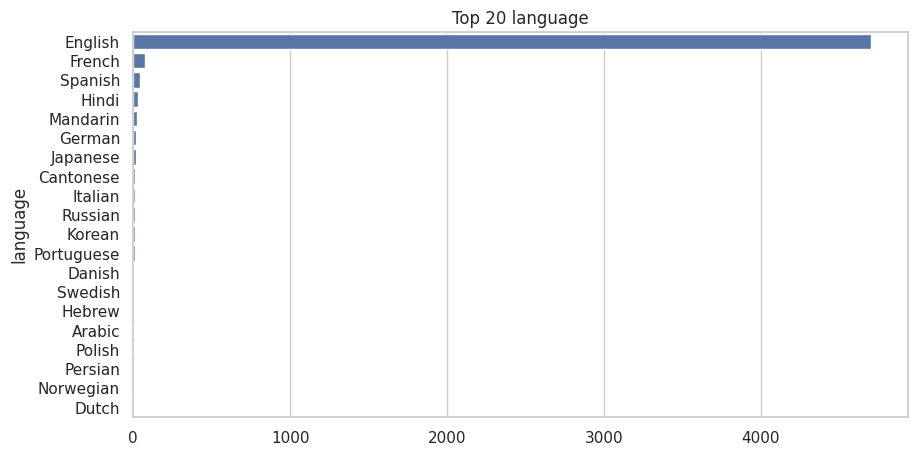

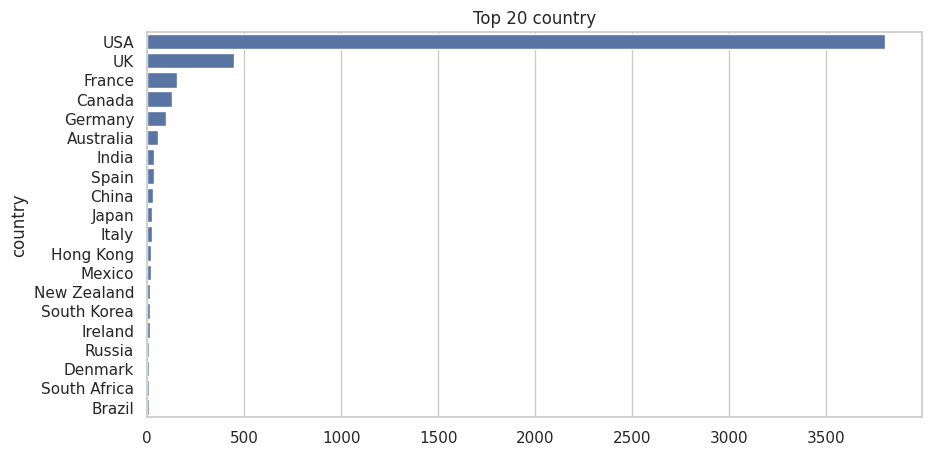

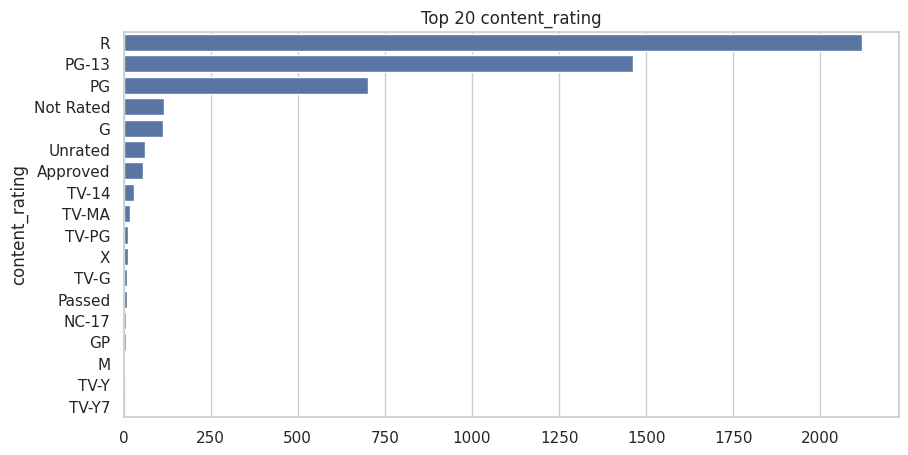

In [11]:
categorical_cols = [
    'color', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
    'genres', 'plot_keywords', 'language', 'country', 'content_rating'
]

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    top_vals = df[col].value_counts().nlargest(20)
    sns.barplot(x=top_vals.values, y=top_vals.index)
    plt.title(f"Top 20 {col}")
    plt.show()


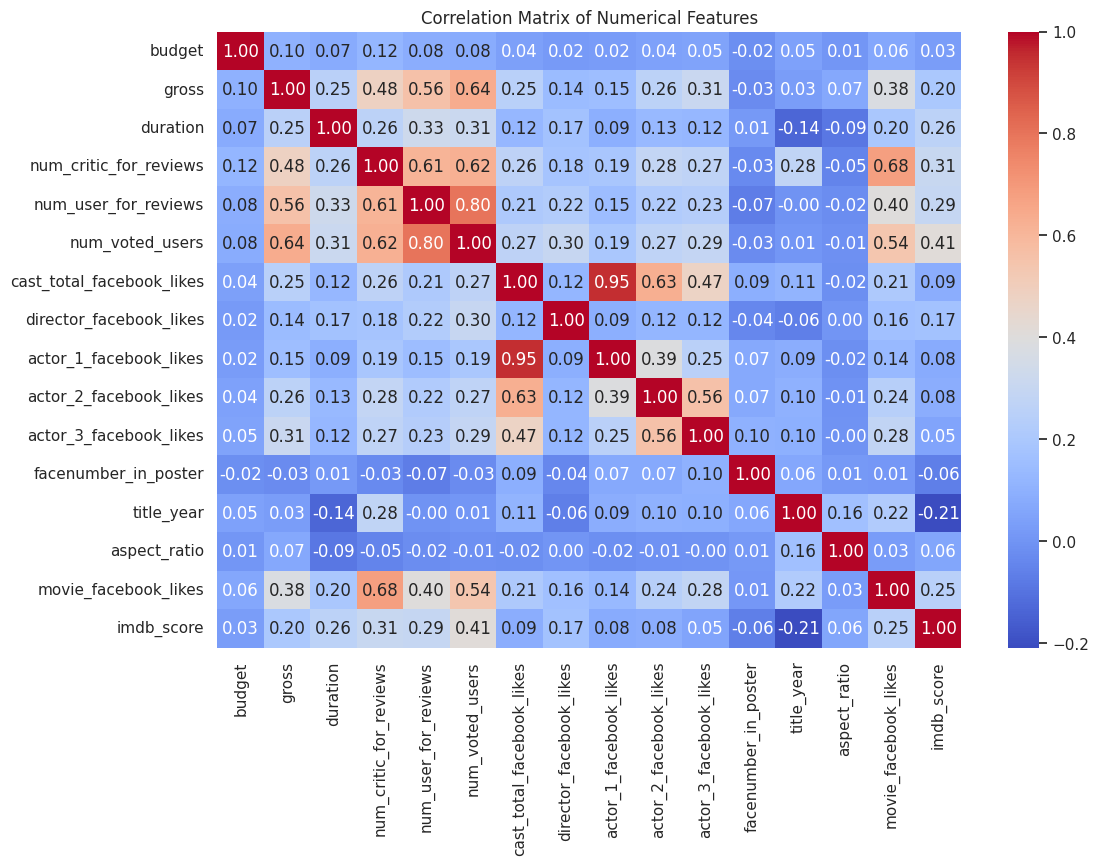

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [13]:
df[numerical_cols].corr()

,budget,gross,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,cast_total_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,facenumber_in_poster,title_year,aspect_ratio,movie_facebook_likes,imdb_score
budget,1.000000,0.102179,0.074276,0.119994,0.084292,0.079621,0.036557,0.021090,0.022639,0.044236,0.047451,-0.019559,0.045726,0.006598,0.062039,0.030688
gross,0.102179,1.000000,0.250298,0.480601,0.559958,0.637271,0.247400,0.144945,0.154468,0.262768,0.308026,-0.027755,0.030886,0.069346,0.378082,0.198021
duration,0.074276,0.250298,1.000000,0.258486,0.328403,0.314765,0.123074,0.173296,0.088449,0.131673,0.123558,0.013469,-0.135038,-0.090071,0.196605,0.261662
num_critic_for_reviews,0.119994,0.480601,0.258486,1.000000,0.609387,0.624943,0.263203,0.180674,0.190016,0.282306,0.271646,-0.033897,0.275707,-0.049786,0.683176,0.305303
num_user_for_reviews,0.084292,0.559958,0.328403,0.609387,1.000000,0.798406,0.206923,0.221890,0.145461,0.219496,0.230189,-0.069018,-0.003147,-0.024719,0.400594,0.292475
num_voted_users,0.079621,0.637271,0.314765,0.624943,0.798406,1.000000,0.265911,0.297057,0.192804,0.270790,0.287239,-0.026998,0.007397,-0.014761,0.537924,0.410965
cast_total_facebook_likes,0.036557,0.247400,0.123074,0.263203,0.206923,0.265911,1.000000,0.119549,0.951661,0.628404,0.473920,0.091475,0.109971,-0.017885,0.209786,0.085787
director_facebook_likes,0.021090,0.144945,0.173296,0.180674,0.221890,0.297057,0.119549,1.000000,0.090723,0.119601,0.120199,-0.041268,-0.063820,0.001642,0.162048,0.170802
actor_1_facebook_likes,0.022639,0.154468,0.088449,0.190016,0.145461,0.192804,0.951661,0.090723,1.000000,0.390487,0.249927,0.072257,0.086873,-0.020049,0.135348,0.076099
actor_2_facebook_likes,0.044236,0.262768,0.131673,0.282306,0.219496,0.270790,0.628404,0.119601,0.390487,1.000000,0.559662,0.071228,0.101890,-0.007783,0.243487,0.083808


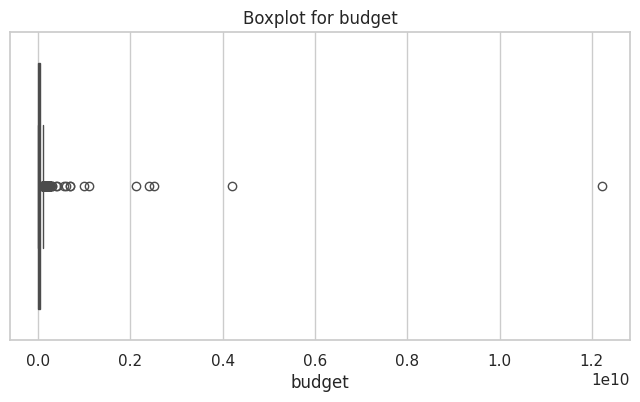

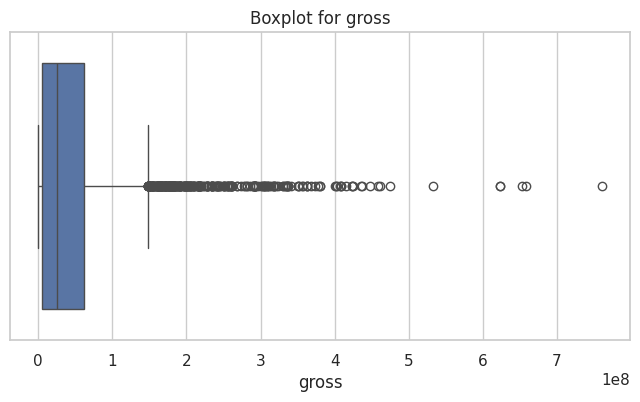

In [14]:
# Outlier check for budget & gross
for col in ['budget', 'gross']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [15]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# Fraction of zeros (or <1 cause of float)  per column
zero_fraction = (df[numeric_cols] < 1.0).sum() / len(df)
zero_fraction


num_critic_for_reviews       0.000000
duration                     0.000000
director_facebook_likes      0.179853
actor_3_facebook_likes       0.017648
actor_1_facebook_likes       0.005156
gross                        0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.006544
facenumber_in_poster         0.426730
num_user_for_reviews         0.000000
budget                       0.000000
title_year                   0.000000
actor_2_facebook_likes       0.010906
imdb_score                   0.000000
aspect_ratio                 0.000000
movie_facebook_likes         0.432481
is_good                      0.647432
dtype: float64

***Building final dataset***

In [16]:
numeric_features = [
    "budget",
    "gross",
    "duration",
    "num_critic_for_reviews",
    "num_user_for_reviews",
    "num_voted_users",
    "title_year",
]
categorical_features = [
    "color",
    "genres",
    "language",
    "country",
    "content_rating",
]
y  = ["is_good"]

selected_columns = numeric_features + categorical_features + y

In [17]:
df_subset = df[selected_columns].copy()


In [23]:
df_subset

,budget,gross,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year,color,genres,language,country,content_rating,is_good
0,237000000.0,760505847.0,178.0,723.0,3054.0,886204,2009.0,Color,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG-13,1
1,300000000.0,309404152.0,169.0,302.0,1238.0,471220,2007.0,Color,Action|Adventure|Fantasy,English,USA,PG-13,1
2,245000000.0,200074175.0,148.0,602.0,994.0,275868,2015.0,Color,Action|Adventure|Thriller,English,UK,PG-13,0
3,250000000.0,448130642.0,164.0,813.0,2701.0,1144337,2012.0,Color,Action|Thriller,English,USA,PG-13,1
4,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,Documentary,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,NaN,NaN,87.0,1.0,6.0,629,2013.0,Color,Comedy|Drama,English,Canada,NaN,1
5039,NaN,NaN,43.0,43.0,359.0,73839,NaN,Color,Crime|Drama|Mystery|Thriller,English,USA,TV-14,1
5040,1400.0,NaN,76.0,13.0,3.0,38,2013.0,Color,Drama|Horror|Thriller,English,USA,NaN,0
5041,NaN,10443.0,100.0,14.0,9.0,1255,2012.0,Color,Comedy|Drama|Romance,English,USA,PG-13,0


In [18]:
df_subset.isna().sum()

budget                    492
gross                     884
duration                   15
num_critic_for_reviews     50
num_user_for_reviews       21
num_voted_users             0
title_year                108
color                      19
genres                      0
language                   14
country                     5
content_rating            303
is_good                     0
dtype: int64

In [24]:
# Filling NaNs
for col in numeric_features:
    df_subset[col] = df_subset[col].fillna(df_subset[col].median())

# Fill categorical NaNs with mode
for col in categorical_features:
    df_subset[col] = df_subset[col].fillna(df_subset[col].mode()[0])


In [25]:
df_subset.isna().sum()


budget                    0
gross                     0
duration                  0
num_critic_for_reviews    0
num_user_for_reviews      0
num_voted_users           0
title_year                0
color                     0
genres                    0
language                  0
country                   0
content_rating            0
is_good                   0
dtype: int64

In [26]:
# Multi-hot encoding for genres
df_subset["genres"] = df_subset["genres"].fillna("").apply(lambda x: x.split("|"))
all_genres = sorted({g for sublist in df_subset["genres"] for g in sublist if g != ""})
for genre in all_genres:
    df_subset[f"genre_{genre}"] = df_subset["genres"].apply(lambda lst: int(genre in lst))

df_subset = df_subset.drop(columns=["genres"])


In [27]:
df_subset

,budget,gross,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year,color,language,country,...,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Thriller,genre_War,genre_Western
0,237000000.0,760505847.0,178.0,723.0,3054.0,886204,2009.0,Color,English,USA,...,0,0,0,0,1,0,0,0,0,0
1,300000000.0,309404152.0,169.0,302.0,1238.0,471220,2007.0,Color,English,USA,...,0,0,0,0,0,0,0,0,0,0
2,245000000.0,200074175.0,148.0,602.0,994.0,275868,2015.0,Color,English,UK,...,0,0,0,0,0,0,0,1,0,0
3,250000000.0,448130642.0,164.0,813.0,2701.0,1144337,2012.0,Color,English,USA,...,0,0,0,0,0,0,0,1,0,0
4,20000000.0,25517500.0,103.0,110.0,156.0,8,2005.0,Color,English,USA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,20000000.0,25517500.0,87.0,1.0,6.0,629,2013.0,Color,English,Canada,...,0,0,0,0,0,0,0,0,0,0
5039,20000000.0,25517500.0,43.0,43.0,359.0,73839,2005.0,Color,English,USA,...,1,0,0,0,0,0,0,1,0,0
5040,1400.0,25517500.0,76.0,13.0,3.0,38,2013.0,Color,English,USA,...,0,0,0,0,0,0,0,1,0,0
5041,20000000.0,10443.0,100.0,14.0,9.0,1255,2012.0,Color,English,USA,...,0,0,0,1,0,0,0,0,0,0


In [28]:
categorical_simple = ["color", "language", "country", "content_rating"]

df_subset = pd.get_dummies(
    df_subset,
    columns=categorical_simple,
    dummy_na=False
)


In [34]:
df_subset.columns.to_list()

['budget',
 'gross',
 'duration',
 'num_critic_for_reviews',
 'num_user_for_reviews',
 'num_voted_users',
 'title_year',
 'is_good',
 'genre_Action',
 'genre_Adventure',
 'genre_Animation',
 'genre_Biography',
 'genre_Comedy',
 'genre_Crime',
 'genre_Documentary',
 'genre_Drama',
 'genre_Family',
 'genre_Fantasy',
 'genre_Film-Noir',
 'genre_Game-Show',
 'genre_History',
 'genre_Horror',
 'genre_Music',
 'genre_Musical',
 'genre_Mystery',
 'genre_News',
 'genre_Reality-TV',
 'genre_Romance',
 'genre_Sci-Fi',
 'genre_Short',
 'genre_Sport',
 'genre_Thriller',
 'genre_War',
 'genre_Western',
 'color_ Black and White',
 'color_Color',
 'language_Aboriginal',
 'language_Arabic',
 'language_Aramaic',
 'language_Bosnian',
 'language_Cantonese',
 'language_Chinese',
 'language_Czech',
 'language_Danish',
 'language_Dari',
 'language_Dutch',
 'language_Dzongkha',
 'language_English',
 'language_Filipino',
 'language_French',
 'language_German',
 'language_Greek',
 'language_Hebrew',
 'language

In [29]:
df_subset

,budget,gross,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year,is_good,genre_Action,genre_Adventure,...,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-MA,content_rating_TV-PG,content_rating_TV-Y,content_rating_TV-Y7,content_rating_Unrated,content_rating_X
0,237000000.0,760505847.0,178.0,723.0,3054.0,886204,2009.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
1,300000000.0,309404152.0,169.0,302.0,1238.0,471220,2007.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,245000000.0,200074175.0,148.0,602.0,994.0,275868,2015.0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
3,250000000.0,448130642.0,164.0,813.0,2701.0,1144337,2012.0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
4,20000000.0,25517500.0,103.0,110.0,156.0,8,2005.0,1,0,0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,20000000.0,25517500.0,87.0,1.0,6.0,629,2013.0,1,0,0,...,False,True,False,False,False,False,False,False,False,False
5039,20000000.0,25517500.0,43.0,43.0,359.0,73839,2005.0,1,0,0,...,False,False,True,False,False,False,False,False,False,False
5040,1400.0,25517500.0,76.0,13.0,3.0,38,2013.0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
5041,20000000.0,10443.0,100.0,14.0,9.0,1255,2012.0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# print(df_subset.isna().sum().sum())